# Uber 交通数据可视化

[![Licensed with MIT!](https://img.shields.io/github/license/Dragon1573/Python-Analysis?color=blue&label=License&style=flat-square)](https://github.com/Dragon1573/Python-Analysis/blob/master/LICENSE)
[![Datasets from Kaggle](https://img.shields.io/badge/Kaggle-118KB-blue?style=flat-square&logo=Kaggle)](https://www.kaggle.com/shobhit18th/uber-traffic-data-visualization)

## 背景

&emsp;&emsp;班加罗尔是印度南部城市，卡纳塔克邦的首府，印度第五大城市，人口约1050万人。印度在1947年独立以后，班加罗尔发展成重工业的中心。高科技公司在班加罗尔的成功建立使其成为印度信息科技的中心，被誉为“亚洲的硅谷”。班加罗尔是印度科技研究的枢纽，其中的印度科学学院是印度历史最为悠久的大学和研究所。

&emsp;&emsp;人们漫步在美国的硅谷，都会由衷地赞叹那儿优美的自然环境。但班加罗尔市给人的印象并不是世界科技的中心、美国的“后台办公室”。低矮的房屋绵绵不断，人畜并行的现象随处可见。在城市交通方面，豪瑟大道已成为班加罗尔市交通事故死亡率最高的地方，平均每年约有800个生灵葬身于车轮之下。身处这儿，你会发现各式各样的机动车、非机动车和行人在狭窄的街道上挤成一团。尤其在市区南部高新技术公司比较集中的地方，交通高峰期道路更是拥挤不堪。

&emsp;&emsp;据统计，班加罗尔人口数量从1992年的450万猛增到2002年的650万。人口增长间接造成社会车辆的增加，目前班加罗尔市机动车保有量约为200万辆，远超市政道路设施的承受力。由于印度法律严格保护私有财产，使得在市区内进行拆迁和道路改造工作举步维艰，高架桥建设进展缓慢，结果造成交通堵塞现象日益严重。班加罗尔的交通问题已经严重影响了当地公司的工作和生产效率，引发许多公司的抱怨和不满，一些大公司甚至开始在其他城市建起新的研发和生产基地。

&emsp;&emsp;目前，邦政府已经制定了一个详细的基础设施发展纲要，计划开始修建两条穿城而过的轨道交通线路，增加高架桥和立交桥的修建，拓宽部分道路，同时鼓励新公司到交通状况较好的北部地区建厂，以缓解南部的交通压力。

## 内容

&emsp;&emsp;现代城市日新月异，机动车交通的兴起改变了我们的城市设计。了解一座城市的交通流量和峰谷时段变化至关重要，因此**分析交通数据并从中提取关键信息**非常重要。我们邀请数据科学家、相关分析人员和存在研究兴趣的社会人士来分析**班加罗尔市**的交通数据，并帮助邦政府提出符合实际、行之有效的交通调度和城市规划方案。

&emsp;&emsp;数据下载自 [Kaggle](https://www.kaggle.com/shobhit18th/uber-traffic-data-visualization) ，从 [MachineHack](https://www.machinehack.com/) 转载而来，最初来源为 [Uber Movement](https://movement.uber.com/) 。

## 题目及任务

### 步骤一　下载数据集并导入所需程序包

```bash
# 激活 Anaconda 环境
activate

# 确认 Numpy 是否已安装
python -m pip list | grep 'numpy' > /dev/null
if [ $? == 1 ]; then
    echo 'Installing Numpy ...'
    python -m pip install numpy
fi
echo 'Numpy has successfully installed!'

# 确认 Pandas 是否已安装
python -m pip list | grep 'pandas' > /dev/null
if [ $? == 1 ]; then
    echo 'Installing Pandas ...'
    python -m pip install numpy
fi
echo 'Pandas has successfully installed!'

# 确认 Scikit-learn 是否已安装
python -m pip list | grep 'sklearn' > /dev/null
if [ $? == 1 ]; then
    echo 'Installing Scikit-learn ...'
    python -m pip install numpy
fi
echo 'Scikit-learn has successfully installed!'

# 确认 Matplotlib 是否已经安装
python -m pip list | grep 'matplotlib' > /dev/null
if [ $? == 1]; then
    echo 'Installing Matplotlib ...'
    python -m pip install matplotlib
fi
echo 'Matplotlib has successfully installed!'

# 确认 kaggle 是否已安装
python -m pip list | grep 'kaggle' > /dev/null
if [ $? == 1 ]; then
    echo 'Installing Kaggle ...'
    python -m pip install kaggle
fi
echo 'Kaggle has successfully installed!'

# 检查数据集是否存在
if [ -f 'Final_Majestic_to_AIM_jan-2016tomarch-2018.xlsx' ]; then
    echo 'Datasets has successfully downloaded!'
else
    echo 'Downloading datasets ...'
    python -m kaggle datasets download -d shobhit18th/uber-traffic-data-visualization -q --unzip
    echo 'Download complete!'
fi
```

In [1]:
# 数据框
import pandas

# pandas时间转换器
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# 数学运算工具集
import numpy

# 绘图工具集
from matplotlib import pyplot

# 聚类分析
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### 步骤二　数据预处理

In [2]:
# 从 Excel 读入数据
table = pandas.read_excel('Final_Majestic_to_AIM_jan-2016tomarch-2018.xlsx', encoding='UTF-8', index_col='Date')

&emsp;&emsp;通过`Microsoft Excel`直接查看数据，可以发现数据中存在个别标签列，我们需要进行哑元沉默处理。

In [3]:
# 哑变量处理
table = pandas.get_dummies(table)

&emsp;&emsp;哑元处理完成后，我们发现被沉默的哑元标签其实只有1种，即只存在1个相应的哑元列且哑元列所有元素均为1。

&emsp;&emsp;对于一个元素完全相同的数据集，其标准差为0。我们可以根据这个特点剔除没有实际意义的列。

&emsp;&emsp;剔除完成后的数据仍有18列，我们仅选取各参数的平均数据（`* Mean Travel Time (Seconds)`）进行研究。

In [4]:
# 提取需要研究的列
table = table[[
    'AM Mean Travel Time (Seconds)',
    'PM Mean Travel Time (Seconds)',
    'Midday Mean Travel Time (Seconds)',
    'Evening Mean Travel Time (Seconds)',
    'Early Morning Mean Travel Time (Seconds)'
]]
table.columns = ['Morning', 'Afternoon', 'Midday', 'Evening', 'Midnight']

&emsp;&emsp;由于`Microsoft Excel`的数据解析格式与`pandas`不同，导致原始数据的时间列排序混乱。我们需要在`pandas`中按照正确的时间匹配规则重新对时间列进行提取转换。

In [5]:
# 转换为时刻索引和时段列
table.index = pandas.to_datetime(table.index)
table.sort_index(inplace=True)

&emsp;&emsp;通过`Microsoft Excel`观察原始数据，我们发现数据集整体共计821行，仅有1行存在空缺单元格，残缺行占总数据规模的$0.125\%$。

&emsp;&emsp;由于残缺行占比很小，可以直接删除残缺行。

In [6]:
# 删除数据残缺行
table.dropna(axis=0, how='any', inplace=True)

&emsp;&emsp;原始数据中存在不少的异常数据，我们需要对这些异常值进行处理。

In [7]:
def outliersScaler(series: pandas.Series) -> pandas.Series:
    '''
    异常值清洗方法 
    
    @param series - 数据列
    @return 数据列
    '''
    QL = series.quantile(0.25)
    QU = series.quantile(0.75)
    IQR = QU - QL
    series.loc[series > (QU + 1.5 * IQR)] = QU
    series.loc[series < (QL - 1.5 * IQR)] = QL
    return series

# 清洗异常值
for column in table.columns:
    table[column] = outliersScaler(table[column])

C:\Users\legen\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


### 步骤三　数据可视化

#### 一．箱线图

&emsp;&emsp;箱线图是由数据的5项统计性指标绘制而成的，这5个指标分别为`上边缘`、`上四分位数`、`中位数`、`下四分位数`、`下边缘`。它的功能并不局限于识别异常值，它还能反映数据的分布特征，并用于多组数据间的特征比较。

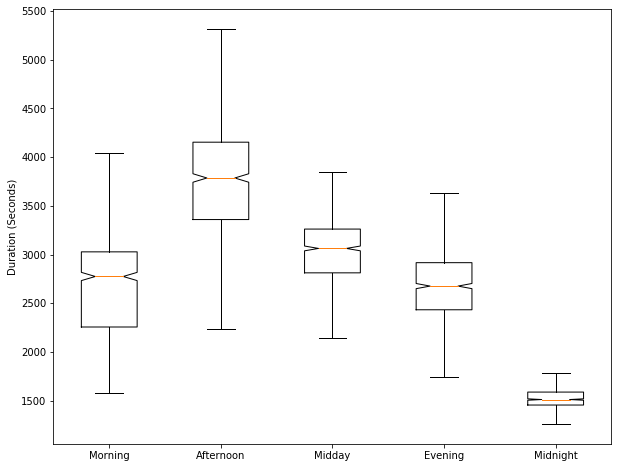

In [8]:
%matplotlib inline
pyplot.figure(figsize=(10, 8))
pyplot.boxplot(table.to_numpy(), notch=True, labels=table.columns, meanline=True)
pyplot.ylabel('Duration (Seconds)')
pyplot.savefig('imgs/Boxplot.svg')
pyplot.show()

&emsp;&emsp;根据以上绘制的箱线图，我们可以获得以下结论：在2016年1月～2018年12月间，

- 下午是每日交通的高峰期，平均通勤时长超过 `3600 sec`（`1 hr`） ；而凌晨是每日交通的低谷期，平均通勤时长在 `1500 sec`（`25 min`），其他时段基本处于每日的正常通勤状况。
- 在凌晨，城市的交通情况最为优秀，乘客通勤时间最稳定；而在其他时段，城市的交通情况较为复杂，乘客通勤过程中频繁出现提前或滞后很长时间到达。
- 在早晨，较多乘客会比平均预期通勤时间更早到达；而在其他时段，乘客通勤时长分布比例比较平均。

#### 二．移动平均数

&emsp;&emsp;移动平均数是一种用于描述特定时间段内数据变化趋势的平滑曲线，我们可以根据移动平均数并辅以回归分析，对未来数据进行可靠地预测。

&emsp;&emsp;此处，我们选择的移动窗口大小为360天，即绘制 `MA360` 曲线。

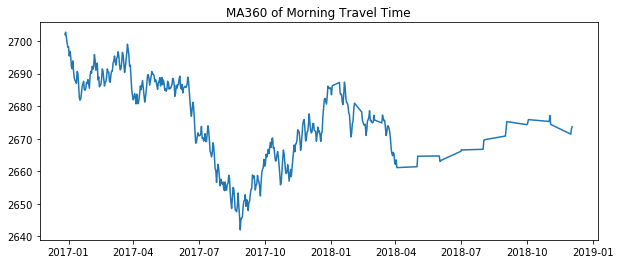

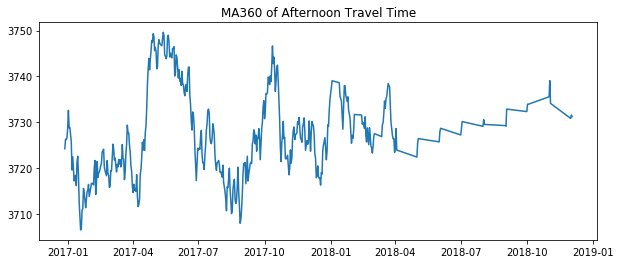

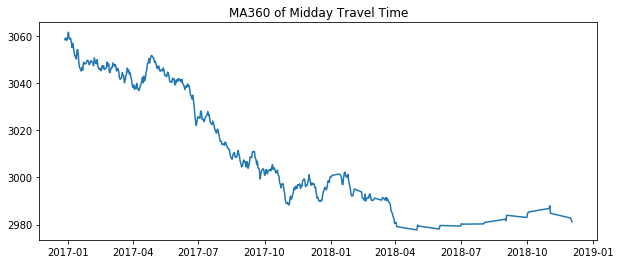

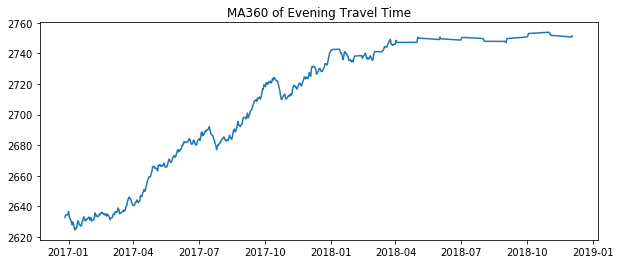

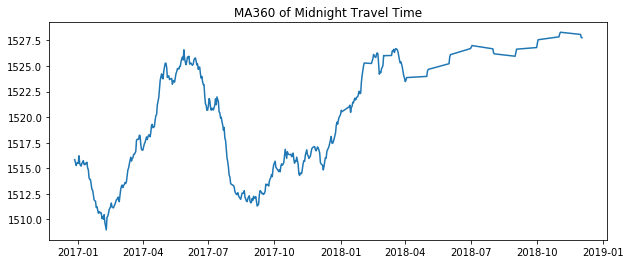

In [9]:
%matplotlib inline
for i in range(len(table.columns)):
    # 创建画布
    pyplot.figure(figsize=(10, 4))
    # 生成移动平均数据集
    series = numpy.zeros_like(table.iloc[:, i])
    for j in range(360, len(series)):
        # 使用 MA60 作为移动平均曲线
        series[j] = numpy.average(table.iloc[j - 360:j, i])
    series[series == 0] = numpy.NaN
    pyplot.plot(table.index, series)
    pyplot.title('MA360 of ' + table.columns[i] + ' Travel Time')
    # 保存子图
    pyplot.savefig('imgs/MA10-%d.svg' % i)
    pyplot.show()

&emsp;&emsp;通过以上6幅曲线图，我们可以得出以下结论：

- 在2017年初～2018年底的2年时间里，班加罗尔市早晨、下午的通勤时长都出现了非常剧烈的波动。这2个时段都是城市交通最为繁忙的，它们分别包含了早高峰和晚高峰，高峰时段内的交通状况最为复杂，通勤时长难以固定。
- 班加罗尔市正午和晚间时段的交通状况这2年中变化趋势明显，正午通勤时长显著缩短，而晚间通勤时间在不断延长。

#### 三．K-Means（K阶平均值）聚类

&emsp;&emsp;聚类分析能帮助我们对数据进行分类。在此例中，我们将数据分为3类，并分别标记为 `Good`、`Normal`、`Worse` 。通过对2016年初～2018年底共3年时间820条数据进行聚类，我们可以近似描绘班加罗尔市3年来的整体交通概况。

In [10]:
# 对数据进行标准差标准化
tableScaled = StandardScaler().fit_transform(table)
table['Cluster'] = KMeans(n_clusters=3, random_state=0x6A1B).fit_predict(tableScaled)
print('3个类别的元素数量分别为：', table['Cluster'].value_counts(), sep='\n')

3个类别的元素数量分别为：
2    385
0    254
1    181
Name: Cluster, dtype: int64


In [11]:
# 确定聚类编号与类别标签的对应关系
mean_value = pandas.DataFrame(index=['Morning', 'Afternoon', 'Midday', 'Evening', 'Midnight'])
for i in range(0, 3):
    generatedCluster = table.loc[
        table['Cluster'] == i, 
        ['Morning', 'Afternoon', 'Midday', 'Evening', 'Midnight']
    ]
    mean_value[str(i)] = generatedCluster.mean()
print('3个聚类各分量的平均值为：', mean_value, sep='\n')

3个聚类各分量的平均值为：
                     0            1            2
Morning    3059.280512  2041.143646  2733.470130
Afternoon  4267.862205  2787.500000  3789.189610
Midday     3306.285433  2522.596685  3059.053247
Evening    2938.543307  2291.515193  2709.867532
Midnight   1594.200787  1508.662983  1477.049351


&emsp;&emsp;根据以上2项数据，我们可以大致推断出：

- `Cluster No.0` 对应的标签是 `Worse` ，3年间共有254天处于这种交通状况。
- `Cluster No.1` 对应的标签是 `Good` ，3年间只有181天处于这种交通状况。
- `Cluster No.2` 对应的标签是 `Normal` ，3年间共有385天处于这种交通状况。

## 结论与改进方案

&emsp;&emsp;从以上数据及其分析可以看出，班加罗尔市的城市交通质量相对较差，在早晚高峰期时段交通拥堵情况尤为严重；只有在晚间到深夜时段，交通压力才有所缓解。

&emsp;&emsp;建设城市轨道交通、大力推进公共交通出行，控制并逐步降低城市社会机动车保有量是一个有效的解决方案。班加罗尔市道路狭窄，不利于社会机动车通行。借助公共交通，政府监管部门能够对全市的交通状况进行严格地调度，保证城市路面交通的正常运行。

## 致谢

1. MachineHack: <https://www.machinehack.com/>
2. Uber Movement: <https://movement.uber.com/>